In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [98]:
#homelessness dataframe creation
file_to_load = "Homelessness_Count_USA.csv"
homelessness_data = pd.read_csv(file_to_load)
homelessness_df = pd.DataFrame(homelessness_data)

#list of counties for looking through homeless data with
counties = ["Los Angeles City & County CoC", 
            "San Francisco CoC", 
            "Las Vegas/Clark County CoC",
            "Metropolitan Denver Homeless Initiative", 
            "Kansas City/Independence/Lee's Summit/Jackson County CoC", 
            "Cook County CoC", 
            "Fulton County Continuum of Care", 
            "Miami/Dade County CoC", 
            "Philadelphia CoC", 
            "Phoenix/Mesa/Maricopa County Regional CoC",
            "Boston CoC", 
            "Detroit CoC", 
            "Indianapolis CoC", 
            "Seattle/King County CoC", 
            "Dallas City & County/Irving CoC", 
            "Nashville/Davidson County CoC", 
            "Albuquerque CoC", 
            "Charlotte/Mecklenberg CoC", 
            "New York City CoC", 
            "Minneapolis/Hennepin County CoC"]

#preparing to drop indexes that are not total homeless
index_names = homelessness_df[homelessness_df['Attribute Name'] != 'Total Homeless'].index

#new df with just total homeless values
clean_homeless_data = homelessness_df.drop(index_names)
clean_homeless_data

#drawing out only 2014 values
remove_2015 = clean_homeless_data[clean_homeless_data['Year - Text'] != 2014].index
homeless_2014 = clean_homeless_data.drop(remove_2015)
county_clean_homeless_data_2014_df = homeless_2014.set_index('CoC Name')

#drawing out only 2015 values
remove_2014 = clean_homeless_data[clean_homeless_data['Year - Text'] != 2015].index
homeless_2015 = clean_homeless_data.drop(remove_2014)
county_clean_homeless_data_2015_df = homeless_2015.set_index('CoC Name')

#print test to make sure the specific year will print
print(county_clean_homeless_data_2014_df.loc['San Francisco CoC','Value'])
print(county_clean_homeless_data_2015_df.loc['San Francisco CoC','Value'])

6408
6775


In [99]:
#want to take specific data and append it to list
list_2014_total_homeless = []
list_2015_total_homeless = []

for county_name in counties:
    homeless_value_2014 = county_clean_homeless_data_2014_df.loc[county_name, 'Value']
    list_2014_total_homeless.append(homeless_value_2014)
    homeless_value_2015 = homeless_value_2015 = county_clean_homeless_data_2015_df.loc[county_name, 'Value']
    list_2015_total_homeless.append(homeless_value_2015)  
    
print(list_2014_total_homeless)
print(list_2015_total_homeless)

[34393, 6408, 7443, 6621, 1931, 1182, 477, 4156, 5738, 5918, 5987, 2755, 1890, 8949, 3514, 2234, 1254, 2014, 67810, 3731]
[41174, 6775, 7509, 5335, 1446, 895, 473, 4152, 5998, 5631, 6492, 2597, 1666, 10122, 3141, 2154, 1287, 2001, 75323, 3215]


In [100]:
#created city list from courtney's list in case we want to merge information of weather and so we can merge on same 'on'
matching_citylist = ['Los_Angeles_County', 
                     'San_Francisco_County', 
                     'Clark_County', 
                     'Denver_County', 
                     'Jackson_County', 
                     'Cook_County', 
                     'Fulton_County', 
                     'Miami_Dade_County', 
                     'Philadelphia_County', 
                     'Maricopa_County', 
                     'Suffolk_County', 
                     'Wayne_County', 
                     'Marion_County', 
                     'King_County', 
                     'Dallas_County',
                     'Davidson_County', 
                     'Bernalillo_County', 
                     'Mecklenburg_County', 
                     'New_York_County', 
                     'Hennepin_County']

#making database from each value and index value
homelessness_2014_df = pd.DataFrame(list_2014_total_homeless, index = matching_citylist)
homelessness_2015_df = pd.DataFrame(list_2015_total_homeless, index = matching_citylist)

#giving name to indexes
homelessness_2014_df.index.name = 'County'
homelessness_2015_df.index.name = 'County'

#rename columns
homelessness_2014_df = homelessness_2014_df.rename(columns = {0 : 'Value_2014'})
homelessness_2015_df = homelessness_2015_df.rename(columns = {0 : 'Value_2015'})

In [101]:
homelessness_2014_df
homelessness_2014_df.to_csv('Homeless_2014.csv', index = True, header = True)

<AxesSubplot:xlabel='County'>

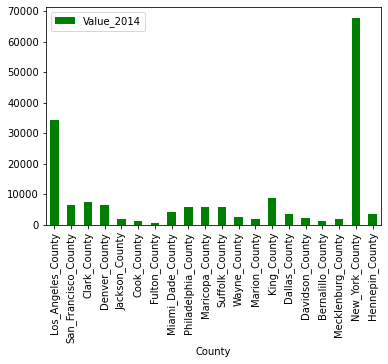

In [102]:
homeless_2014_bar_plot = homelessness_2014_df.plot(kind = 'bar', color = 'green')
homeless_2014_bar_plot

In [104]:
homelessness_2015_df
homelessness_2015_df.to_csv('Homeless_2015.csv', index = True, header = True)

<AxesSubplot:xlabel='County'>

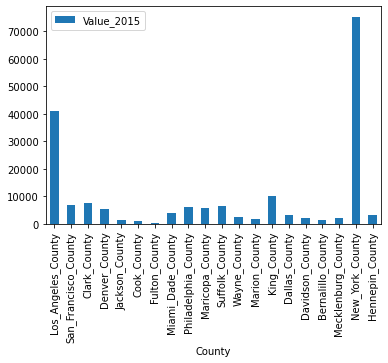

In [105]:
homeless_2015_bar_plot = homelessness_2015_df.plot(kind = 'bar')
homeless_2015_bar_plot

In [106]:
merged_homelessness = pd.merge(homelessness_2014_df, homelessness_2015_df, on = 'County')
merged_homelessness

,Value_2014,Value_2015
County,,
Los_Angeles_County,34393,41174
San_Francisco_County,6408,6775
Clark_County,7443,7509
Denver_County,6621,5335
Jackson_County,1931,1446
Cook_County,1182,895
Fulton_County,477,473
Miami_Dade_County,4156,4152
Philadelphia_County,5738,5998


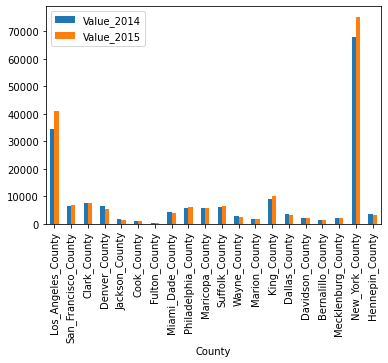

In [107]:
homeless_bar_plot = merged_homelessness.plot(kind = 'bar')

In [110]:
merged_homelessness['Difference'] = merged_homelessness['Value_2015'].sub(merged_homelessness['Value_2014'], axis = 0)
merged_homelessness

,Value_2014,Value_2015,Difference
County,,,
Los_Angeles_County,34393,41174,6781
San_Francisco_County,6408,6775,367
Clark_County,7443,7509,66
Denver_County,6621,5335,-1286
Jackson_County,1931,1446,-485
Cook_County,1182,895,-287
Fulton_County,477,473,-4
Miami_Dade_County,4156,4152,-4
Philadelphia_County,5738,5998,260


In [118]:
diff = merged_homelessness['Value_2015'] - merged_homelessness['Value_2014']
diff = diff.sort_values(ascending = False)

<AxesSubplot:xlabel='County'>

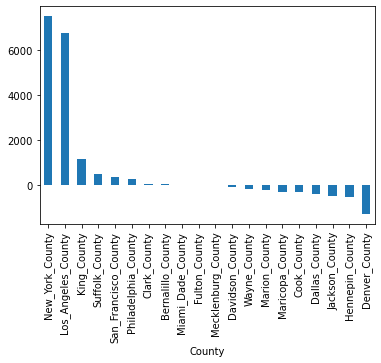

In [120]:
diff.plot(kind = 'bar')

In [128]:
#percent change
percent_change = (diff/merged_homelessness['Value_2015']) *100
percent_change = percent_change.sort_values(ascending = False)
percent_change

County
Los_Angeles_County      16.469131
King_County             11.588619
New_York_County          9.974377
Suffolk_County           7.778805
San_Francisco_County     5.416974
Philadelphia_County      4.334778
Bernalillo_County        2.564103
Clark_County             0.878945
Miami_Dade_County       -0.096339
Mecklenburg_County      -0.649675
Fulton_County           -0.845666
Davidson_County         -3.714020
Maricopa_County         -5.096786
Wayne_County            -6.083943
Dallas_County          -11.875199
Marion_County          -13.445378
Hennepin_County        -16.049767
Denver_County          -24.104967
Cook_County            -32.067039
Jackson_County         -33.540802
dtype: float64

<AxesSubplot:xlabel='County'>

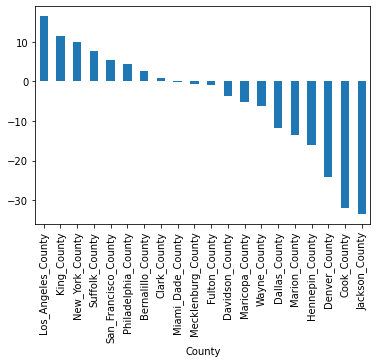

In [127]:
percent_change.plot(kind = 'bar')